## Machine Learning na Prática

<p> Vamos criar um modelo preditivo completo para prever o preço de ações
    
<p> Para visualizar o código de uma determinada ação ou criptomoeda basta acessar o site https://br.financas.yahoo.com/    

In [4]:
#importando a biblioteca do YahooFinance para baixar cotações
#Caso não tenha instalado ainda esse pacote, basta digitar !pip3 install yfinance
import yfinance as yF 

# Imports para manipulação de dados
#import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
%matplotlib inline


# Importando os pacotes para o modelo preditivo
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Carrega o dataset
Cotacoes = yF.Ticker("ITUB3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="5y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-13 00:00:00-03:00,19.42,19.43,16.86,19.00,2731000,0.00,0.00
2020-03-16 00:00:00-03:00,17.11,18.80,17.01,17.11,2819900,0.00,0.00
2020-03-17 00:00:00-03:00,17.83,18.92,17.00,17.90,2126800,0.00,0.00
2020-03-18 00:00:00-03:00,17.30,17.37,15.95,16.37,2707300,0.00,0.00
2020-03-19 00:00:00-03:00,16.41,17.48,15.30,16.70,4444400,0.00,0.00


In [6]:
# Retirar o indice do campo data
dados.reset_index(inplace=True)
dados.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-03-13 00:00:00-03:00,19.42,19.43,16.86,19.00,2731000,0.00,0.00
1,2020-03-16 00:00:00-03:00,17.11,18.80,17.01,17.11,2819900,0.00,0.00
2,2020-03-17 00:00:00-03:00,17.83,18.92,17.00,17.90,2126800,0.00,0.00
3,2020-03-18 00:00:00-03:00,17.30,17.37,15.95,16.37,2707300,0.00,0.00
4,2020-03-19 00:00:00-03:00,16.41,17.48,15.30,16.70,4444400,0.00,0.00


In [7]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1239,2025-03-07 00:00:00-03:00,29.07,29.49,28.82,29.20,847900,0.00,0.00
1240,2025-03-10 00:00:00-03:00,29.20,29.33,28.91,29.22,876300,0.00,0.00
1241,2025-03-11 00:00:00-03:00,29.29,29.29,28.94,29.03,810400,0.00,0.00
1242,2025-03-12 00:00:00-03:00,29.10,29.23,28.93,29.13,660200,0.00,0.00
1243,2025-03-13 00:00:00-03:00,29.13,29.55,29.13,29.49,242500,0.00,0.00


In [8]:
dados.drop(dados.tail(1).index,inplace=True)
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1238,2025-03-06 00:00:00-03:00,29.10,29.30,28.90,28.93,538400,0.00,0.00
1239,2025-03-07 00:00:00-03:00,29.07,29.49,28.82,29.20,847900,0.00,0.00
1240,2025-03-10 00:00:00-03:00,29.20,29.33,28.91,29.22,876300,0.00,0.00
1241,2025-03-11 00:00:00-03:00,29.29,29.29,28.94,29.03,810400,0.00,0.00
1242,2025-03-12 00:00:00-03:00,29.10,29.23,28.93,29.13,660200,0.00,0.00


In [9]:
# Vamos excluir as colunas que não serão utilizadas e renomear os campos
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Data','Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-03-13 00:00:00-03:00,19.42,19.43,16.86,19.00,2731000
1,2020-03-16 00:00:00-03:00,17.11,18.80,17.01,17.11,2819900
2,2020-03-17 00:00:00-03:00,17.83,18.92,17.00,17.90,2126800
3,2020-03-18 00:00:00-03:00,17.30,17.37,15.95,16.37,2707300
4,2020-03-19 00:00:00-03:00,16.41,17.48,15.30,16.70,4444400


In [10]:
# Vamos observar o nosso range de dados
print('Menor data: ', dados['Data'].min())
print('Maior data:', dados['Data'].max())

Menor data:  2020-03-13 00:00:00-03:00
Maior data: 2025-03-12 00:00:00-03:00


In [11]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
display(dados.loc[dados.index.max()])

Data          2025-03-12 00:00:00-03:00
Abertura                          29.10
Maximo                            29.23
Minimo                            28.93
Fechamento                        29.13
Volume                           660200
Name: 1242, dtype: object

In [12]:
# Tipos de Dados
dados.dtypes

Data          datetime64[ns, America/Sao_Paulo]
Abertura                                float64
Maximo                                  float64
Minimo                                  float64
Fechamento                              float64
Volume                                    int64
dtype: object

In [13]:
# Volume de dados
dados.shape

(1243, 6)

In [14]:
# Sumário estatístico
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1243.00,1243.00,1243.00,1243.00,1243.00
mean,20.72,20.95,20.48,20.71,766681.58
std,4.04,4.03,4.04,4.04,682715.54
min,15.03,15.16,14.64,14.82,108000.00
25%,17.67,17.89,17.41,17.62,419000.00
50%,19.47,19.74,19.25,19.51,608400.00
75%,23.69,23.88,23.52,23.73,909900.00
max,30.42,30.47,30.03,30.29,12082000.00


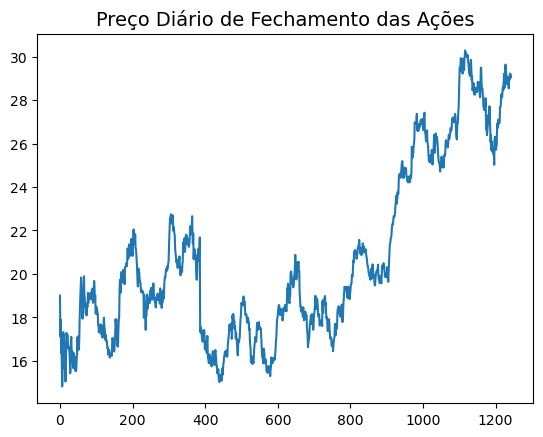

In [15]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [16]:
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-03-13 00:00:00-03:00,19.42,19.43,16.86,19.00,2731000
1,2020-03-16 00:00:00-03:00,17.11,18.80,17.01,17.11,2819900
2,2020-03-17 00:00:00-03:00,17.83,18.92,17.00,17.90,2126800
3,2020-03-18 00:00:00-03:00,17.30,17.37,15.95,16.37,2707300
4,2020-03-19 00:00:00-03:00,16.41,17.48,15.30,16.70,4444400


In [17]:
# Criando novos campos de Média Movel com 5 Dias, 14 Dias e 21 Dias
dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [18]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2020-03-13 00:00:00-03:00,19.42,19.43,16.86,19.00,2731000,NaN,NaN,NaN
1,2020-03-16 00:00:00-03:00,17.11,18.80,17.01,17.11,2819900,NaN,NaN,NaN
2,2020-03-17 00:00:00-03:00,17.83,18.92,17.00,17.90,2126800,NaN,NaN,NaN
3,2020-03-18 00:00:00-03:00,17.30,17.37,15.95,16.37,2707300,NaN,NaN,NaN
4,2020-03-19 00:00:00-03:00,16.41,17.48,15.30,16.70,4444400,17.42,NaN,NaN
5,2020-03-20 00:00:00-03:00,17.64,17.83,15.87,15.87,12082000,16.79,NaN,NaN
6,2020-03-23 00:00:00-03:00,16.32,16.32,14.64,14.82,2682800,16.33,NaN,NaN
7,2020-03-24 00:00:00-03:00,15.48,16.26,15.44,15.44,4674700,15.84,NaN,NaN
8,2020-03-25 00:00:00-03:00,15.56,16.79,15.53,16.29,2080800,15.82,NaN,NaN
9,2020-03-26 00:00:00-03:00,16.29,17.34,16.29,17.32,1730200,15.95,NaN,NaN


In [19]:
dados.dropna(inplace=True)

In [20]:
dados.shape

(1223, 9)

In [25]:
qtd_linhas = len(dados)
qtd_linhas_treino = qtd_linhas - 400
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = 0:{qtd_linhas_teste}:{qtd_linhas}"

)

info

'linhas treino = 0:823 linhas teste = 0:823:1203 linhas validacao = 0:1203:1223'

In [27]:
# Convertendo a coluna de data para datetime (se necessário)
dados['Data'] = pd.to_datetime(dados['Data'])

# Separando variáveis preditoras e variável alvo
preditoras = dados.drop(columns=['Data', 'Fechamento', 'Volume'])  # Mantém apenas variáveis explicativas
target = dados['Fechamento']  # Define a variável alvo

# Exibindo as primeiras linhas para conferência
print("Preditoras:")
print(preditoras.head())

print("\nTarget:")
print(target.head())

Preditoras:
    Abertura  Maximo  Minimo  mm5d  mm14d  mm21d
20     17.17   17.37   16.65 16.82  16.43  16.56
21     17.45   17.82   17.18 17.09  16.56  16.48
22     17.16   17.27   16.58 17.10  16.59  16.46
23     17.09   17.09   16.31 16.96  16.53  16.40
24     16.97   17.28   16.24 16.86  16.53  16.41

Target:
20   17.16
21   17.18
22   16.76
23   16.56
24   16.66
Name: Fechamento, dtype: float64


In [28]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,17.17,17.37,16.65,16.82,16.43,16.56
21,17.45,17.82,17.18,17.09,16.56,16.48
22,17.16,17.27,16.58,17.10,16.59,16.46
23,17.09,17.09,16.31,16.96,16.53,16.40
24,16.97,17.28,16.24,16.86,16.53,16.41


In [29]:
preditoras.tail()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
1238,29.10,29.30,28.90,28.86,29.04,28.90
1239,29.07,29.49,28.82,28.95,29.08,28.95
1240,29.20,29.33,28.91,28.98,29.06,28.99
1241,29.29,29.29,28.94,29.08,29.02,29.01
1242,29.10,29.23,28.93,29.10,28.99,29.04


In [30]:
# Normalizando os dados
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [31]:
# Verificando a normalização realizada
print('Preditoras: ', preditoras_normalizadas.shape)
print(preditoras_normalizadas)

Preditoras:  (1223, 6)
[[0.13906559 0.1443661  0.11716772 0.11150153 0.07775843 0.07851812]
 [0.15715551 0.17386932 0.15241802 0.12979307 0.08624867 0.07250234]
 [0.13857704 0.13797425 0.11269978 0.1303961  0.08854084 0.07131919]
 ...
 [0.92046687 0.92547249 0.92580294 0.92327971 0.93966555 0.94278353]
 [0.92631254 0.92285956 0.92778172 0.92979077 0.93670521 0.94416572]
 [0.91397168 0.91893998 0.92712213 0.9315265  0.93499048 0.94638192]]


In [32]:
# Separando dados para treino e teste
X_Train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

Y_Train = target[:qtd_linhas_treino]
Y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_Train), len(Y_Train))
print(len(X_test), len(Y_test))

823 823
380 380


In [33]:
# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train )
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:99.85'

In [34]:
# Treinamento usando regressão linear
rn = MLPRegressor(max_iter = 2000)
rn.fit(X_Train, Y_Train )
predicao = rn.predict(X_test)
cd = rn.score(X_test,Y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

#Lembrete: Coeficiente de determinação determina a aproximação da linha de regressão.
# Quanto mais próximo de 1 melhor.

'Coeficiente de determinação:81.58'

In [35]:
# Executando a previsão
previsao = preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]
data_pregao_full = dados['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregão':data_pregao, 'Real': res, 'Previsão':pred})

df.set_index('Data_Pregão', inplace = True)

df

,Real,Previsão
Data_Pregão,,
2025-02-11 00:00:00-03:00,29.22,29.21
2025-02-12 00:00:00-03:00,28.57,28.62
2025-02-13 00:00:00-03:00,28.76,28.64
2025-02-14 00:00:00-03:00,29.43,29.38
2025-02-17 00:00:00-03:00,29.64,29.85
2025-02-18 00:00:00-03:00,29.48,29.20
2025-02-19 00:00:00-03:00,29.21,29.21
2025-02-20 00:00:00-03:00,29.05,29.11
2025-02-21 00:00:00-03:00,29.08,29.06


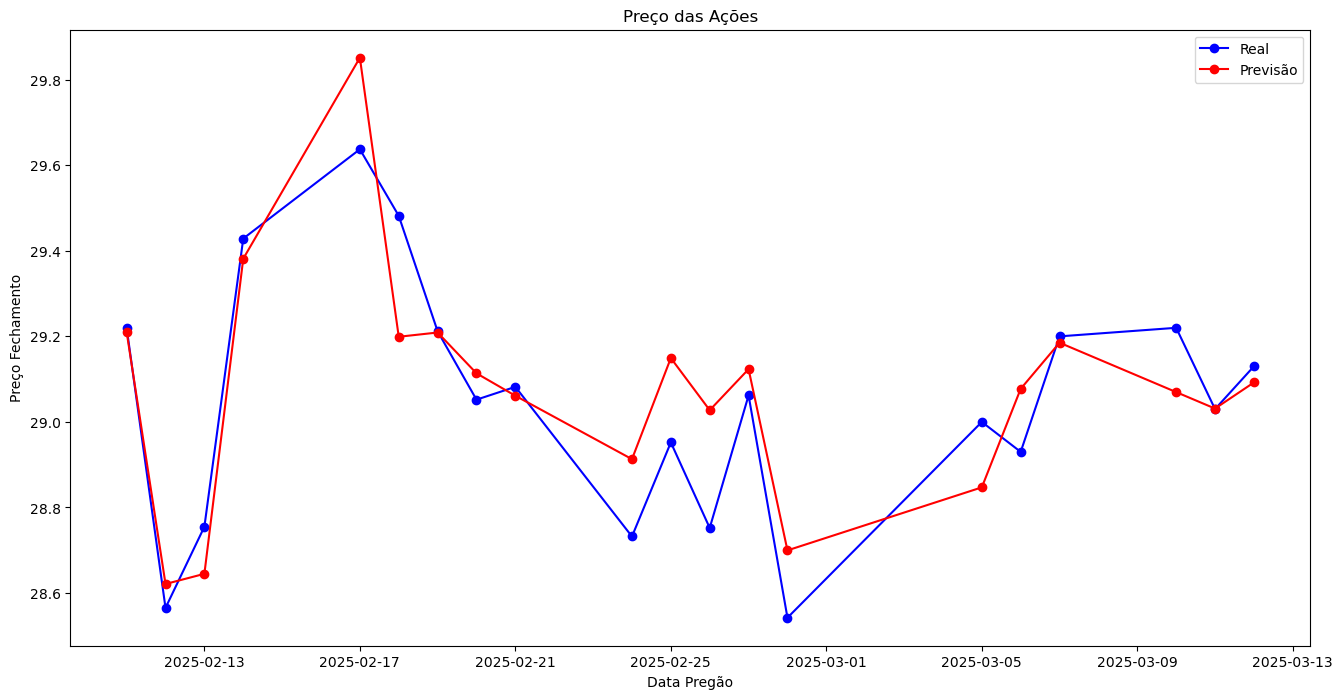

In [36]:
# Gerando o Gráfico
plt.figure(figsize = (16,8))
plt.title('Preço das Ações')
plt.plot(df['Real'], label = 'Real', color = 'blue', marker = 'o')
plt.plot(df['Previsão'], label = 'Previsão', color = 'red', marker = 'o')
plt.xlabel('Data Pregão')
plt.ylabel('Preço Fechamento')
leg = plt.legend()